In [57]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [58]:
###To start, set the path to open your image. In this example the image bands are in a folder called "Image" in the 
###working directory. B* means that the script will read in all band tifs collectively rather than having to code each one.
image_path = glob("Image\LC08_L1TP_207023_20211122_20211130_01_T1_B*.tif")
###Ensure the bands are sorted in order
image_path.sort()
###Stack the bands into a single image. Give the no data values. WHY? WHAT IS META? ARR_ST?
image, meta = es.stack(image_path, nodata=-9999)


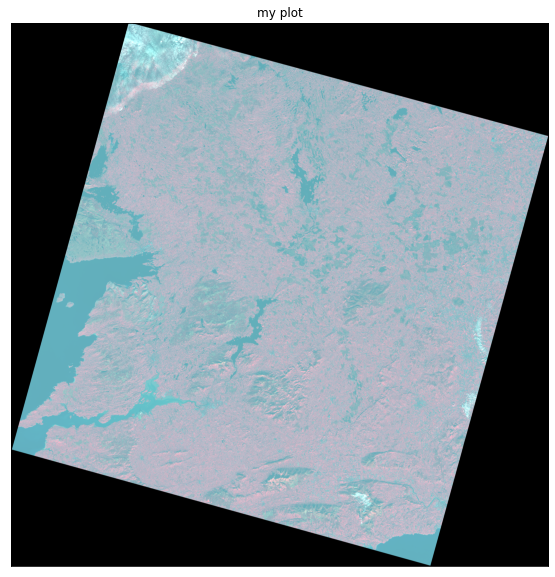

<AxesSubplot:title={'center':'my plot'}>

In [59]:
###plot your image. Default plot below is the false colour composite (4, 3, 2,) but these can be changed. Str_clip will 
###impact the amount of image stretch applied.
ep.plot_rgb(image, rgb = [4, 3, 2], title = "my plot", stretch=True, str_clip=0.1)

In [60]:
###define the key variables for the function, below.
###note that image is defined above when stacking the bands together
###name the raw ndmi plot
ndmi_plot_title = "Your ndmi plot name"
###define the colour map. "RdYlGn" (continuous scale red -> green) is recommended. Other options
###available at https://matplotlib.org/stable/tutorials/colors/colormaps.html
ndmi_cmap = "PRGn"

#vmin and vmax are parameters for plotting the raw ndmi values. Depending on your dataset you might want to bring these
###closer to zero to better show the spread of your data!
vmin = -1
vmax = 1

###below you can specify how many classes you like. Classes defined below are -np.inf (lowest value in dataset) -> 0,
###0 -> 0.15, 0.15 -> 0.3, 0.3 -> 0.5 and 0.5 -> +np.inf (highest value in dataset). 5 classes have been set here.
ndmi_classes = [-np.inf, 0, 0.15, 0.3, 0.5, np.inf]

###and then specify the colours for the classes, make sure this matches the number of classes above
ndmi_colours = ["lightblue", "grey", "yellow", "lightgreen", "green"]

###and name the classes. Again, make sure this matches the number of classes.
ndmi_class_names = ["class one", "class two", "class three", "class four", 
                    "class five"]

###and name your final classification plot's title
classification_plot_title = "Your ndmi classification plot name"

In [61]:
def ndmi (image, ndmi_plot_title, ndmi_cmap, vmin, vmax,
          ndmi_classes, ndmi_colours, ndmi_class_names,
          classification_plot_title):
    '''
    This function will run a normalised difference moisture index(ndmi) on an image defined by the user. 
    It is programmed to use bands 5 and 6 from Landsat 8.
    If using Landsat 4-7 change the function as explained below. The output from this function is a raw ndmi of the image,
    and a classification of the image based on the ndmi values. The variables required to customise the output are above.
    '''
    
    ###Here we define the two bands as floats used to calculate the NDVI: red band and near infrared (NIR) band. 
    ###Keep [4] and [5] if using Landsat 8. Change to [3] and [4] if using Landsat 4-7.   
    nir = image[4].astype(float)
    swir = image[5].astype(float)
    ###and calculate the ndmi values
    my_ndmi = np.divide((nir-swir), (nir+swir))
    
    ###plot the ndmi using variables defined by the user    
    ep.plot_bands(my_ndmi, cmap = ndmi_cmap, title = ndmi_plot_title, vmin = vmin, vmax = vmax)
    
    ###Below we take the output array for our ndmi calculated above and give each value the integer value of the 
    ###classes variables that it falls into
    image_ndmi_class = np.digitize(my_ndmi, ndmi_classes)
    ### Apply a 'no data' mask to the array. This will remove no value data entries
    image_ndmi_class = np.ma.masked_where(np.ma.getmask(my_ndmi), image_ndmi_class)
    np.unique(image_ndmi_class)
    
    ###turn the specified colours variable into cmap format for plotting
    ndmi_cmap = ListedColormap(ndmi_colours)
    
    ###get list of classes from the masked array
    classes = np.unique(image_ndmi_class)
    classes = classes.tolist()
    ###the mask returns a value of 'NONE' as a class. This will give an error message that there are more classes (n+1) than
    ###colours in cmap (n). We can remove this. (The example in the function has n = 9 classes). Make sure the number (9)
    ###matches how many classes are named above
    classes = classes[0:5]

    ###plot your data using variables defined by user.
    fig, ax = plt.subplots(figsize=(14, 14))
    im = ax.imshow(image_ndmi_class, cmap=ndmi_cmap)

    ep.draw_legend(im_ax=im, classes=classes, titles=ndmi_class_names)
    ax.set_title(classification_plot_title,
        fontsize=16,
    )
    ax.set_axis_off()

    ###auto adjust subplot to fit figure size
    plt.tight_layout()
    

C:\Users\IconI\.conda\envs\assignment_env\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


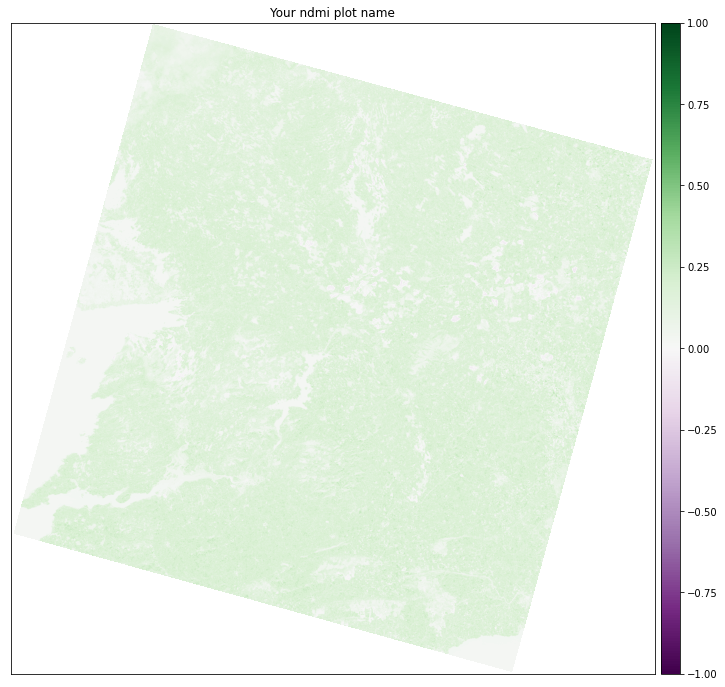

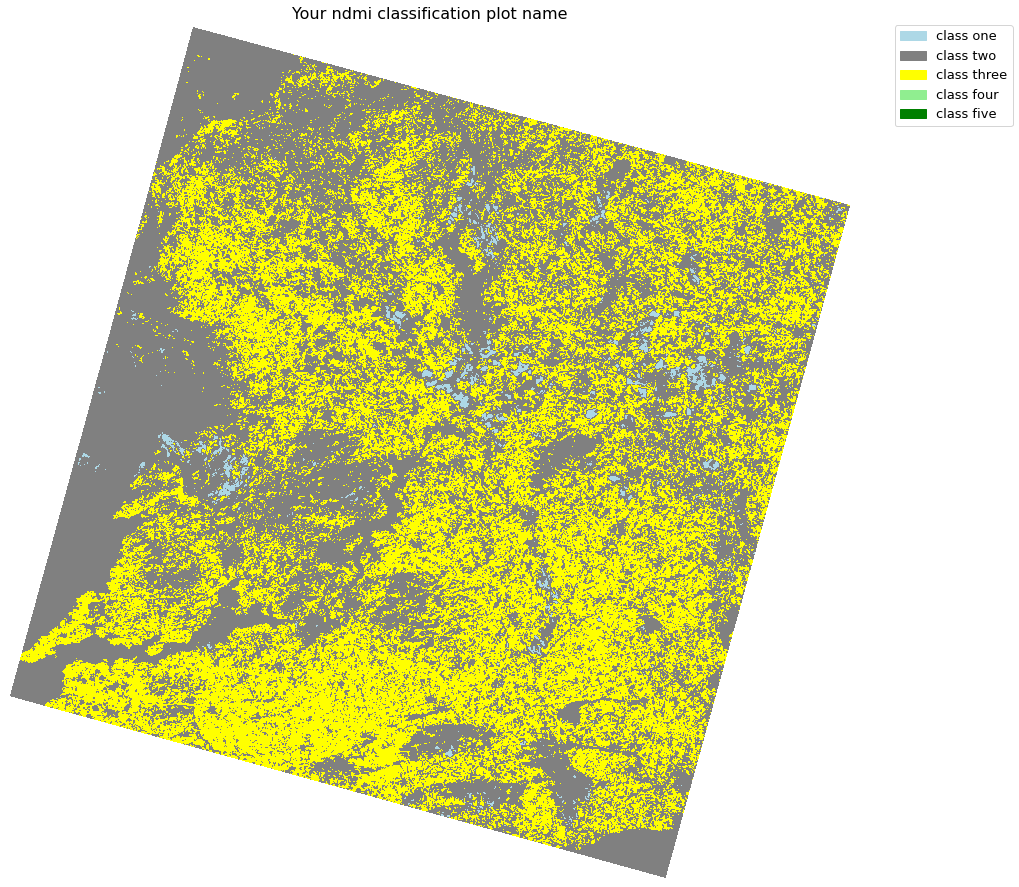

In [62]:
###run the function on your image. This will give you the plotted output for the NDMI.
ndmi(image, ndmi_plot_title, ndmi_cmap, vmin, vmax, ndmi_classes, ndmi_colours, ndmi_class_names, classification_plot_title)
